# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。


> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook

**Q1**: Which category has the highest reviews?

**A1**: Maybe the GAME category has the highest reviews.This means people who play games likes to mark reviews.


**Q2**: What's The relationship between Rating a and Reviews?
    
**A2**: The Reviews and Rating are almost positive correlation.


**Q3**: What is the size of most applications
    
**A3**: The most app size is less 10M.


**Q4**: What is The relationship between Installs a and Reviews?
    
**A4**: The Installs does not have obvious relationship with Reviews.


**Q5**: What kind of applications are the most common in app store?
    
**A5**: The most app are free in app store.


**Q6**: What is The relationship between price a and Reviews?
    
**A6**: The higher the price, the fewer people scored.


**Q7**: Can I download the most applications on my phone which is base on android 3.2?
    
**A7**: No，the most app do not support the device which android version is less than 4.0. 

## Load and Analyze

In [1]:
# TO DO: load pacakges
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import re
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: No such file or directory


In [3]:
# Load the dataset
df = pd.read_csv("googleplaystore.csv")


In [4]:
# Get  data construct
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [5]:
# get the shape of the dataset
df.shape

(10841, 13)

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Deal with the missed value

In [7]:
# Get missed data by columns
df.isnull().any('index').sum()

5

In [8]:
#Get the missed by row number
df.isnull().any("columns").sum()

1481

In [9]:
#Calculate the missed percentage 
totalNumber = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalNumber, percent], axis=1, keys=['TotalNumber', 'Percentage'])
missing_data.head(df.shape[1])

,TotalNumber,Percentage
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


The max missed rate is 0.135965%, this does not hava much impact on the whole，just drop the NA missed value.

In [10]:
#Drop the missed record
df.dropna(how='any',axis ='index',inplace=True)

In [11]:
df.shape

(9360, 13)

In [12]:
df.isnull().any('columns').sum()

0

### Deal with the invalid record

> df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

When excute "df['Reviews'] = df['Reviews'].apply(lambda x: int(x))",the  erro " "invalid literal for int() with base 10: '3.0M'"" occured.
The record "3.0M" is invalid in the Reviews column.

In [13]:
#find the invalid record
df.Type.value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

In [14]:
df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [15]:
df[(df.Type=="0") | (df.Installs=='free') | (df.Reviews =="3.0M")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
#Drop the invalid record
try:
    df.drop(index =df[(df.Type=="0") | (df.Installs=='free') | (df.Reviews =="3.0M")].index[0],axis =0,inplace = True)
except:
    print("drop fail")

drop fail


### Deal with the duplicated record

In [17]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [18]:
df.sort_values(by=['App',"Reviews"],ascending=[True,False],inplace = True)

In [19]:
df.drop_duplicates(keep='first',inplace=True)

In [20]:
df[df.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Exploratory data

In [21]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df['Category'] = df['Category'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Content Rating'] = df['Content Rating'].astype('category')
df['Genres'] = df['Genres'].astype('category')
df.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                object
Installs            object
Type              category
Price               object
Content Rating    category
Genres            category
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

### Category

In [22]:
#Get the total Reviews for each category
totalReviews = df.groupby(by=['Category']).apply(lambda x:x["Reviews"].sum());
totalReviews.sort_values(inplace = True,ascending = False);

In [23]:
totalReviews

Category
GAME                   1415533878
COMMUNICATION           601273091
SOCIAL                  533576498
FAMILY                  396768541
TOOLS                   273180158
PHOTOGRAPHY             204297367
VIDEO_PLAYERS           110379692
PRODUCTIVITY            102554240
SHOPPING                 94930973
PERSONALIZATION          75192419
SPORTS                   65322107
TRAVEL_AND_LOCAL         55565013
ENTERTAINMENT            47570716
NEWS_AND_MAGAZINES       38244909
HEALTH_AND_FITNESS       30845065
MAPS_AND_NAVIGATION      30659060
EDUCATION                23164724
BOOKS_AND_REFERENCE      21872818
FINANCE                  16999569
WEATHER                  14604695
LIFESTYLE                12819560
BUSINESS                 12357705
FOOD_AND_DRINK            7671255
DATING                    5545164
COMICS                    3381945
HOUSE_AND_HOME            2794391
ART_AND_DESIGN            1714317
MEDICAL                   1396427
AUTO_AND_VEHICLES         1163630
LIBRA

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


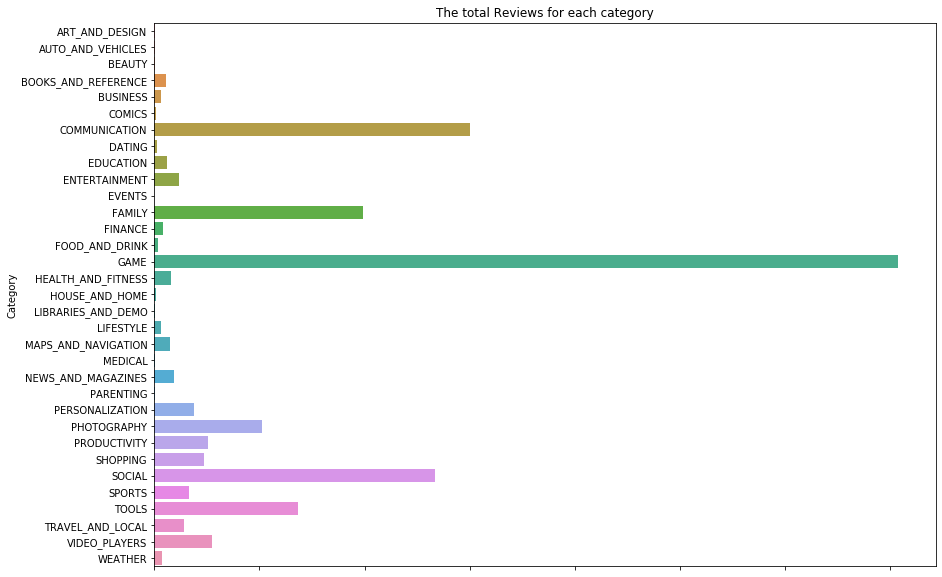

In [24]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.barplot(y=totalReviews.index,x=totalReviews.values,orient='V');
ax.set_xticklabels(g.get_xticklabels(), rotation=90);
ax.set_title("The total Reviews for each category");

The "GAME" and ”COMMUNICATION“ have the top tow Reviews.

In [25]:
maxRevies = df.groupby(by=['Category']).apply(lambda x:x["Reviews"].max())

In [26]:
maxRevies

Category
ART_AND_DESIGN           295237
AUTO_AND_VEHICLES        271920
BEAUTY                   113715
BOOKS_AND_REFERENCE     2915189
BUSINESS                1279800
COMICS                  1013944
COMMUNICATION          69119316
DATING                   516917
EDUCATION               6290507
ENTERTAINMENT           7165362
EVENTS                    40113
FAMILY                 44881447
FINANCE                 1374549
FOOD_AND_DRINK          1032935
GAME                   44893888
HEALTH_AND_FITNESS      4559407
HOUSE_AND_HOME           417907
LIBRARIES_AND_DEMO       332083
LIFESTYLE               2789775
MAPS_AND_NAVIGATION     7232629
MEDICAL                  156410
NEWS_AND_MAGAZINES     11667403
PARENTING                658087
PERSONALIZATION         7464996
PHOTOGRAPHY            10859051
PRODUCTIVITY            5383985
SHOPPING                6212081
SOCIAL                 78158306
SPORTS                 14184910
TOOLS                  42916526
TRAVEL_AND_LOCAL        9235373

In [27]:
# df[[(df.Category == k)&(df.Reviews == v) for k,v in maxRevies.items()]] 

In [28]:
maxReviewsList = DataFrame()
for k,v in maxRevies.items():
    maxReviewsList = pd.concat([maxReviewsList,df[(df.Category == k)&(df.Reviews == v)]])
maxReviewsList

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4241,Textgram - write on photos,ART_AND_DESIGN,4.4,295237,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up
117,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715,Varies with device,"10,000,000+",Free,0,Everyone,Beauty,"August 3, 2017",Varies with device,Varies with device
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,"50,000,000+",Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
4724,LINE WEBTOON - Free Comics,COMICS,4.5,1013944,Varies with device,"10,000,000+",Free,0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
7077,Zoosk Dating App: Meet Singles,DATING,4.0,516917,Varies with device,"10,000,000+",Free,0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device
784,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,"1,000,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


The top Reviews app in each Category is maxReviewsList.

### Rating

In [29]:
df.describe()['Rating']

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

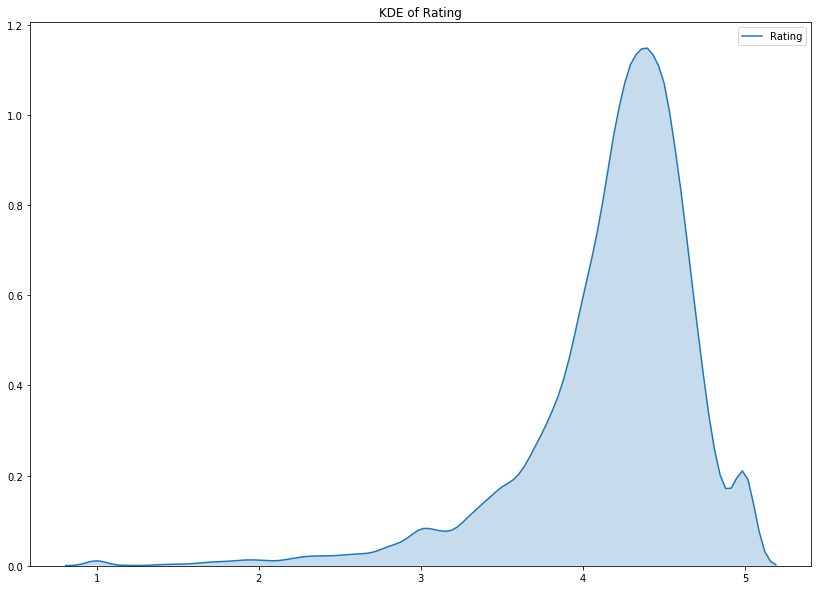

In [30]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.kdeplot(df.Rating, shade = True)
ax.set_title("KDE of Rating");

In [31]:
print("Skewness: %f" % df.Rating.skew())
print("Kurtosis: %f" % df.Rating.kurt())

Skewness: -1.823947
Kurtosis: 5.599205


Skewness < 0: Has thinner tails
Kurtosis > 0:The left tail is longer.The most data exists in the right side
The most app exist between 4.1 and 4.5.

### Reviews

In [32]:
df.describe()['Reviews']

count    8.886000e+03
mean     4.730928e+05
std      2.906007e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.723000e+03
75%      7.131325e+04
max      7.815831e+07
Name: Reviews, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


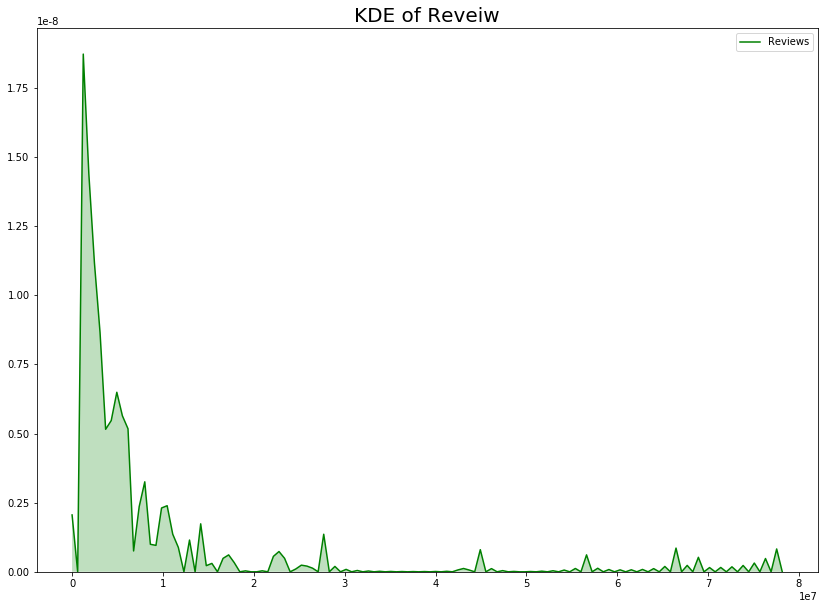

In [33]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.kdeplot(df.Reviews, color="Green", shade = True);
plt.title('KDE of Reveiw',size = 20);

In [34]:
print("Skewness: %f" % df.Reviews.skew())
print("Kurtosis: %f" % df.Reviews.kurt())

Skewness: 16.202305
Kurtosis: 339.693622


Most of app’s Reviews is existed between 1.640000e+02 and 7.131325e+04.

### Reviews VS Rating

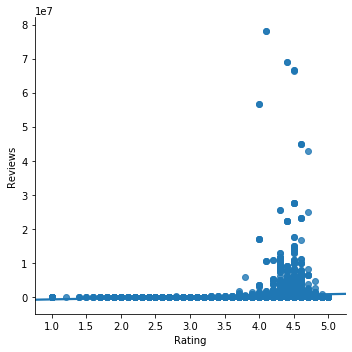

In [35]:
sns.lmplot(x='Rating', y='Reviews', data=df);

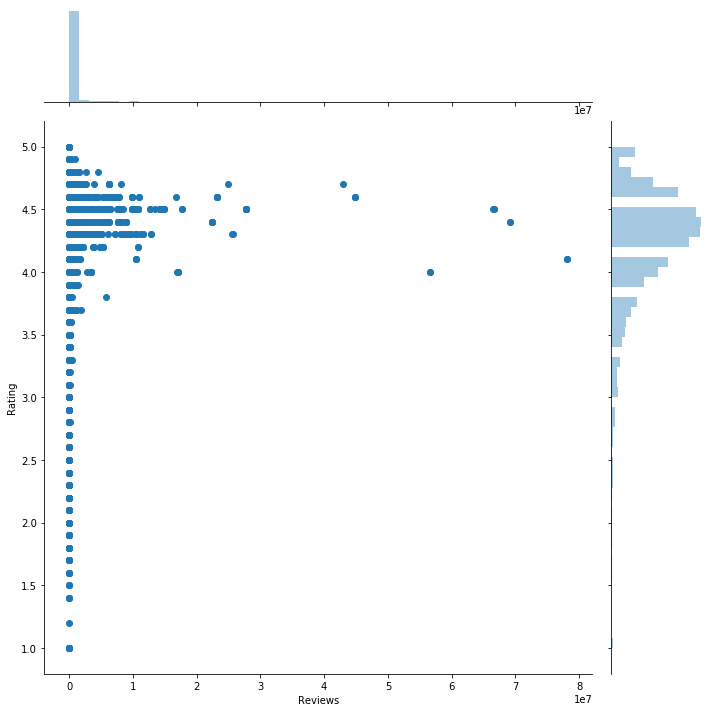

In [36]:
g = sns.jointplot(x="Reviews", y="Rating", data=df,size = 10);

### Size

In [37]:
#Just keep the valid value
sizeDf = df[(df.Size.str.endswith('M') | df.Size.str.endswith('k'))]

In [38]:
sizeDf.Size.value_counts()

14M     153
13M     152
12M     151
15M     149
11M     149
       ... 
525k      1
787k      1
210k      1
847k      1
34k       1
Name: Size, Length: 412, dtype: int64

In [39]:

def changeSize(item):
    if item.endswith('M'):
        return (float)(re.findall(r"\d+\.?\d*",item)[0]) * 1000
    else:
        return (float)(re.findall(r"\d+\.?\d*",item)[0])

sizeDf.Size = sizeDf.Size.apply(changeSize).astype('float64')

In [40]:
sizeDf.Size.astype('float64')

8532    22000.0
324      9100.0
4541      203.0
4636    53000.0
5940    14000.0
         ...   
6420    34000.0
4362    26000.0
2575    18000.0
7559     3200.0
882      4000.0
Name: Size, Length: 7418, dtype: float64

In [41]:
size = pd.cut(sizeDf.Size,bins=10).value_counts()

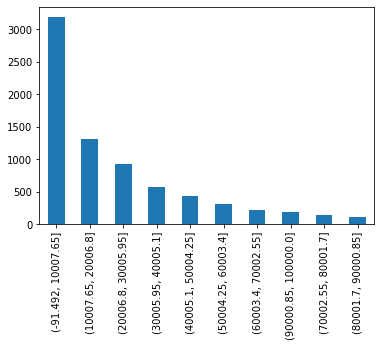

In [42]:
size.plot.bar();

The most app size is less 10M.

### Size VS Rating

<Figure size 1296x1080 with 0 Axes>

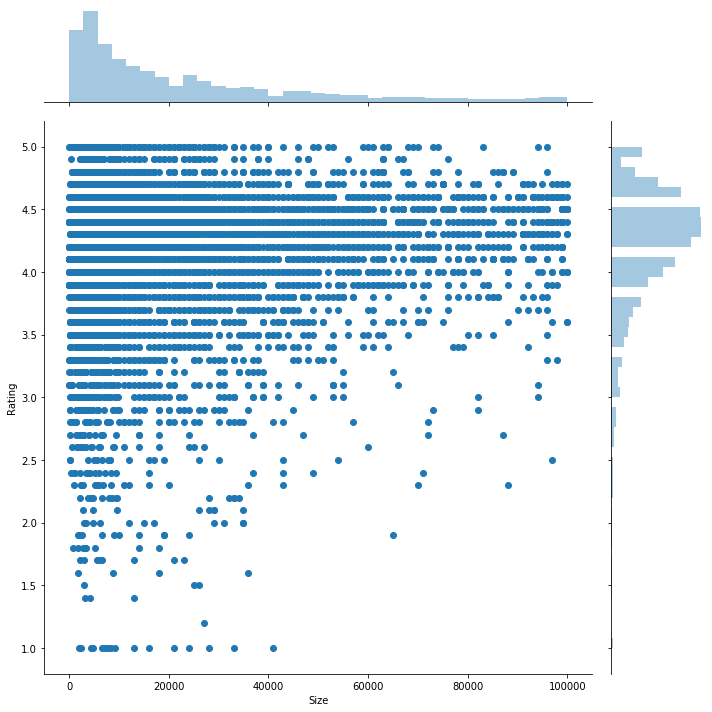

In [43]:
plt.figure(figsize = (18,15));
g = sns.jointplot(x="Size", y="Rating", data=sizeDf,size = 10);

### Size VS Reviews

<Figure size 1296x1080 with 0 Axes>

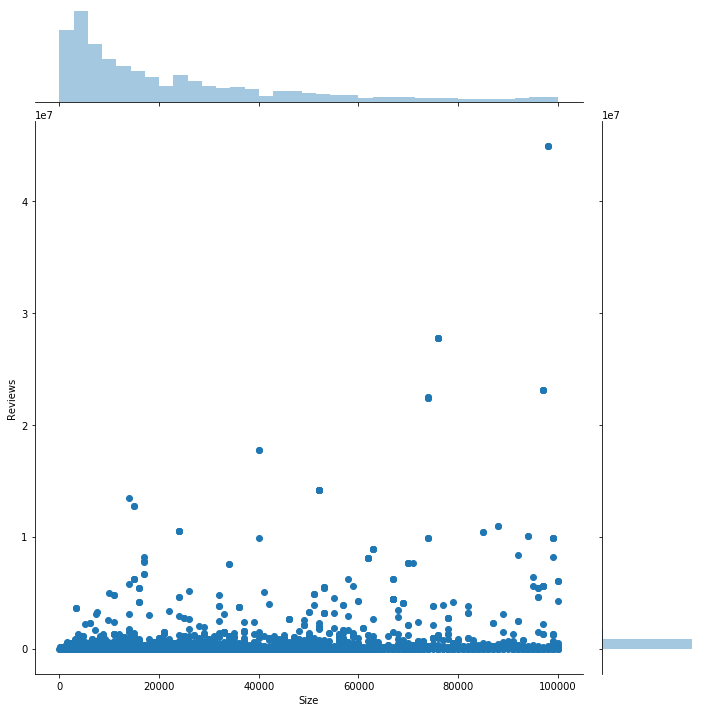

In [44]:
plt.figure(figsize = (18,15));
g = sns.jointplot(x="Size", y="Reviews", data=sizeDf,size = 10);

The Size does not have obvious relationship with Reviews and Rating.

### Installs

In [45]:
installCounts = df.Installs.value_counts()

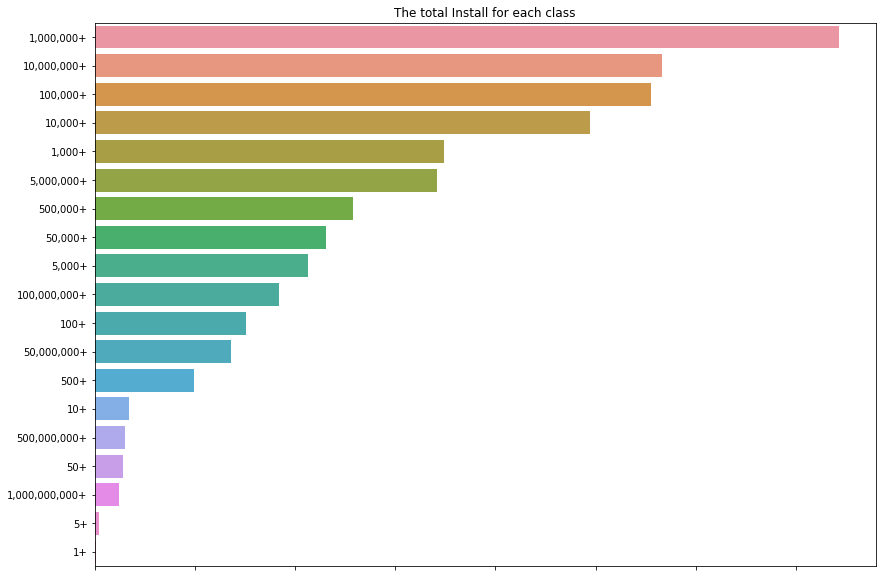

In [46]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.barplot(y=installCounts.index,x=installCounts.values,orient='V');
ax.set_xticklabels(g.get_xticklabels(), rotation=90);
ax.set_title("The total Install for each class");

#### Installs VS Reviews

In [47]:
reviewsCount = df.groupby(by=['Installs']).apply(lambda x:x["Reviews"].count())
reviewsCount.sort_values(inplace = True,ascending = False)

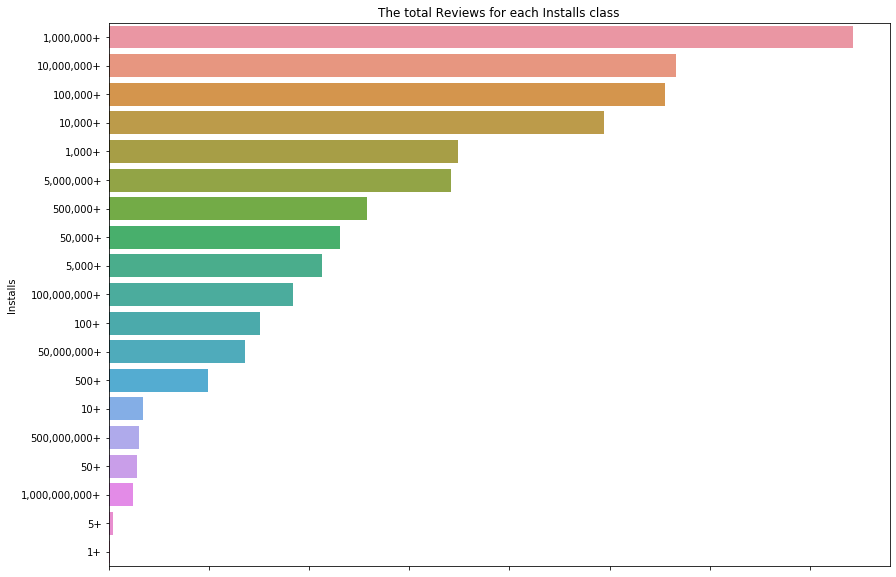

In [48]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.barplot(y=reviewsCount.index,x=reviewsCount.values,orient='V');
ax.set_xticklabels(g.get_xticklabels(), rotation=90);
ax.set_title("The total Reviews for each Installs class");

The Installs does not have obvious relationship with Reviews.

#### Installs VS Rating

In [49]:
ratingCount = df.groupby(by=['Installs']).apply(lambda x:x["Rating"].count())
ratingCount.sort_values(inplace = True,ascending = False)

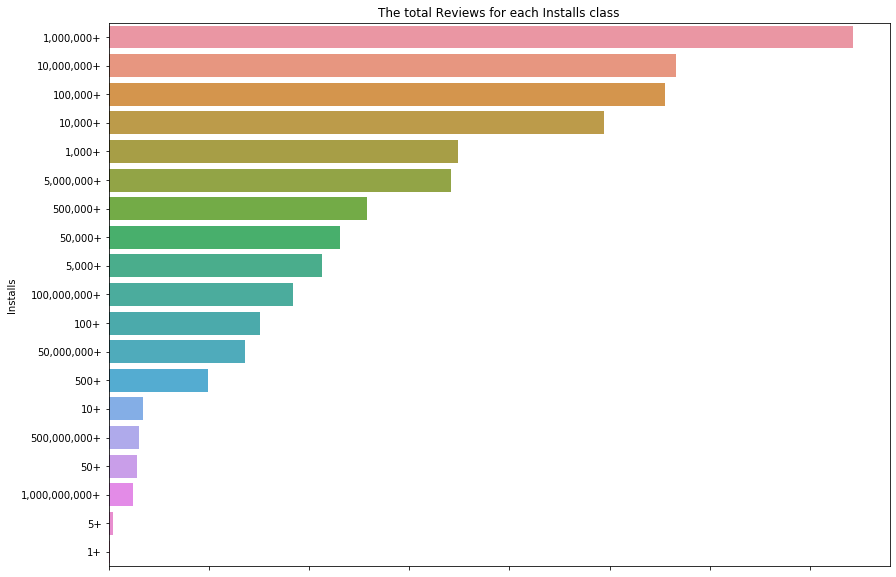

In [50]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.barplot(y=ratingCount.index,x=ratingCount.values,orient='V');
ax.set_xticklabels(g.get_xticklabels(), rotation=90);
ax.set_title("The total Reviews for each Installs class");

### Type

In [51]:
typeCounts = df.Type.value_counts()

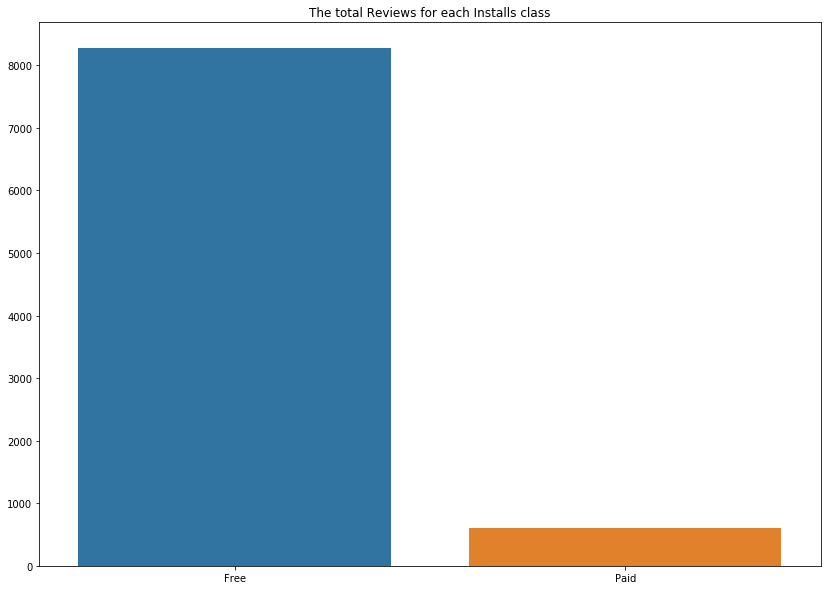

In [52]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.barplot(x=typeCounts.index,y=typeCounts.values,orient='V');
ax.set_xticklabels(g.get_xticklabels(), rotation=0);
ax.set_title("The total Reviews for each Installs class");

The most app are free in app store.

In [53]:
paidApp = df.loc[df.Type == 'Paid']

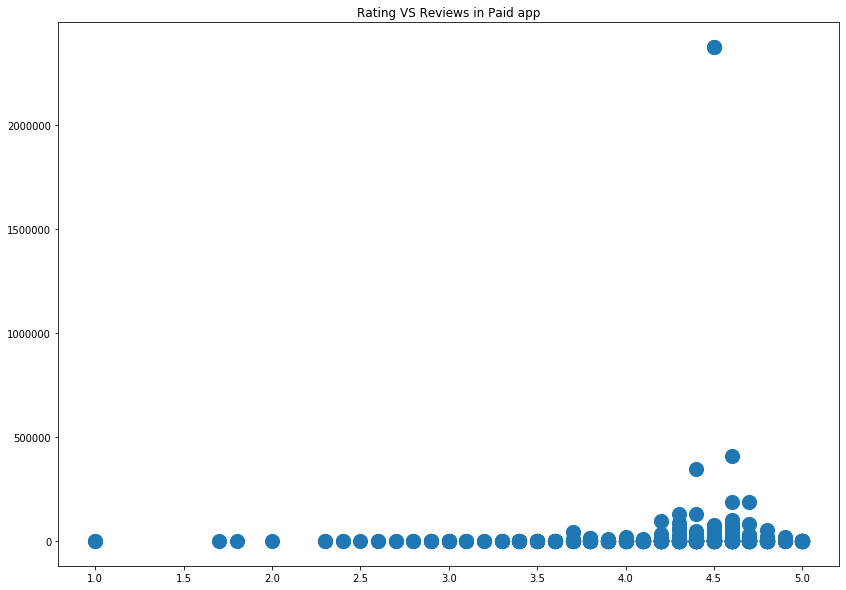

In [54]:
f, ax= plt.subplots(figsize = (14, 10));
plt.scatter(x=paidApp.Rating,y=paidApp.Reviews,s=200)
ax.set_title("Rating VS Reviews in Paid app");

In Paid type app,the Reviews and Rating are positive correlation.

### Price

In [55]:
df.Price

8532          0
324           0
4541          0
4636          0
5940          0
         ...   
6420          0
4362    $399.99
2575          0
7559          0
882           0
Name: Price, Length: 8886, dtype: object

In [56]:
priceDf = df.copy()

In [57]:
priceDf.Price = priceDf.Price.apply(lambda x:x.replace("$","")).astype(float)

In [58]:
#priceDf = priceDf[priceDf.Price != 0.0]

In [59]:
pd.cut(priceDf.Price,bins = 50).value_counts()

(-0.4, 8.0]       8807
(8.0, 16.0]         43
(392.0, 400.0]      12
(16.0, 24.0]        10
(24.0, 32.0]         7
(32.0, 40.0]         3
(376.0, 384.0]       1
(384.0, 392.0]       1
(296.0, 304.0]       1
(72.0, 80.0]         1
(368.0, 376.0]       0
(104.0, 112.0]       0
(152.0, 160.0]       0
(144.0, 152.0]       0
(136.0, 144.0]       0
(128.0, 136.0]       0
(120.0, 128.0]       0
(112.0, 120.0]       0
(80.0, 88.0]         0
(96.0, 104.0]        0
(88.0, 96.0]         0
(168.0, 176.0]       0
(64.0, 72.0]         0
(56.0, 64.0]         0
(48.0, 56.0]         0
(40.0, 48.0]         0
(160.0, 168.0]       0
(184.0, 192.0]       0
(176.0, 184.0]       0
(360.0, 368.0]       0
(352.0, 360.0]       0
(344.0, 352.0]       0
(336.0, 344.0]       0
(328.0, 336.0]       0
(320.0, 328.0]       0
(312.0, 320.0]       0
(304.0, 312.0]       0
(288.0, 296.0]       0
(280.0, 288.0]       0
(272.0, 280.0]       0
(264.0, 272.0]       0
(256.0, 264.0]       0
(248.0, 256.0]       0
(240.0, 248

The price of the most app is less than $8.

#### Price vs Reviews

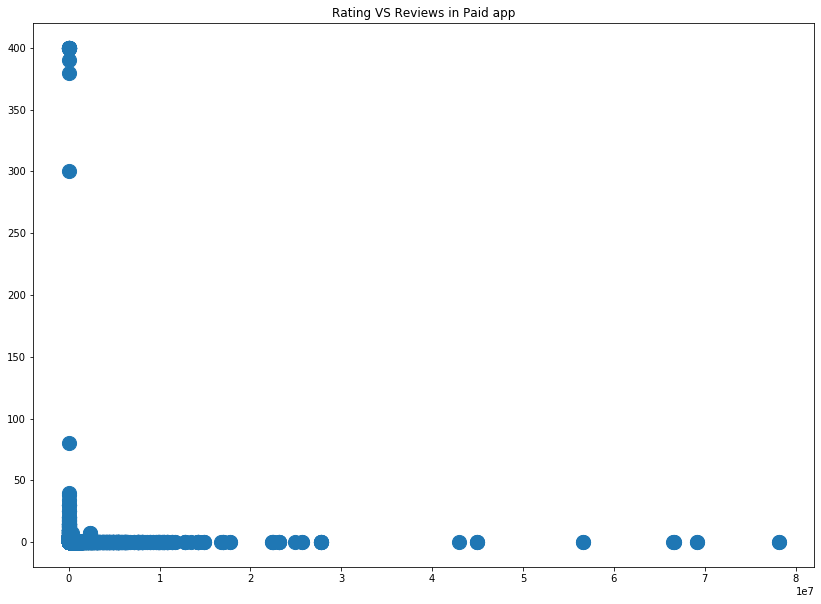

In [60]:
f, ax= plt.subplots(figsize = (14, 10));
plt.scatter(y=priceDf.Price,x=priceDf.Reviews,s=200)
ax.set_title("Rating VS Reviews in Paid app");

The higher the price, the fewer people scored.

### Content Rating

In [61]:
df['Content Rating'].value_counts()

Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### Reviews VS Content Rating

Text(0.5, 1, 'Reviews VS Content Rating')

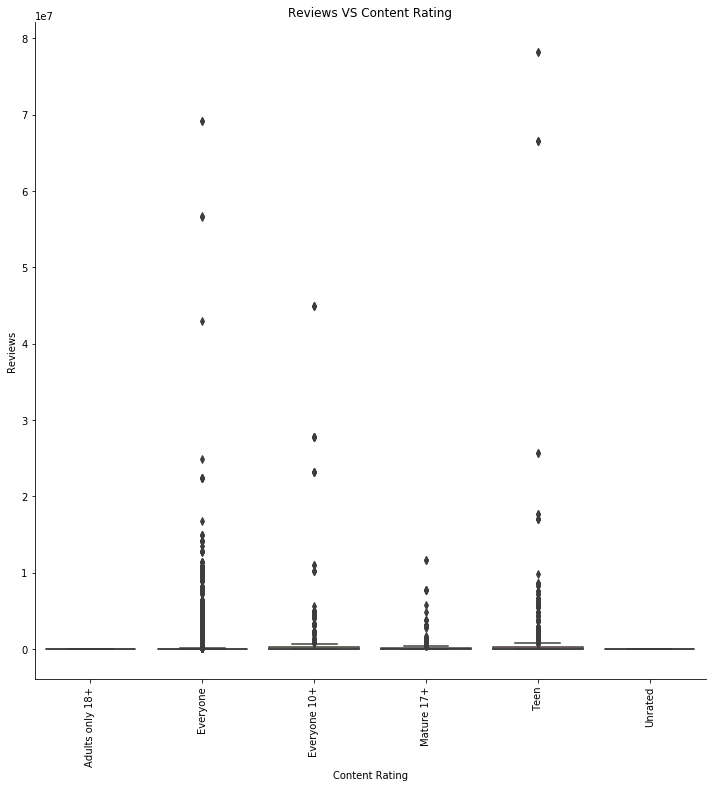

In [62]:
g = sns.catplot(x="Content Rating",y="Reviews",data=df, kind="box", height = 10 ,palette = "Paired")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Reviews")
plt.title('Reviews VS Content Rating')

In [63]:
### Rating VS Content Rating

Text(0.5, 1, 'Rating VS Content Rating')

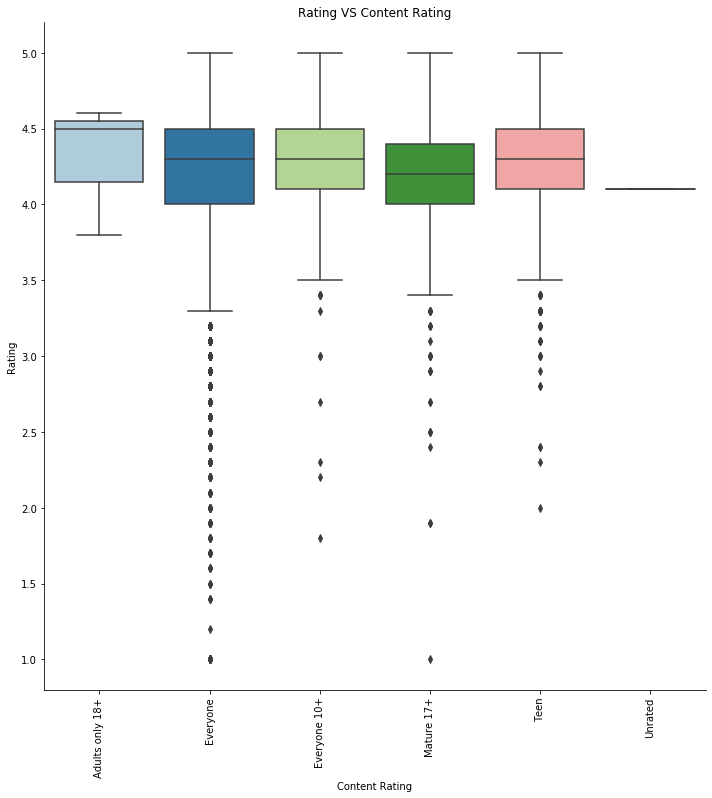

In [64]:
g = sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10 ,palette = "Paired")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Rating VS Content Rating')

Mabybe the "Adults only 18+" app has higher Rating.

### Android Ver

In [65]:
verCounts = df['Android Ver'].value_counts()

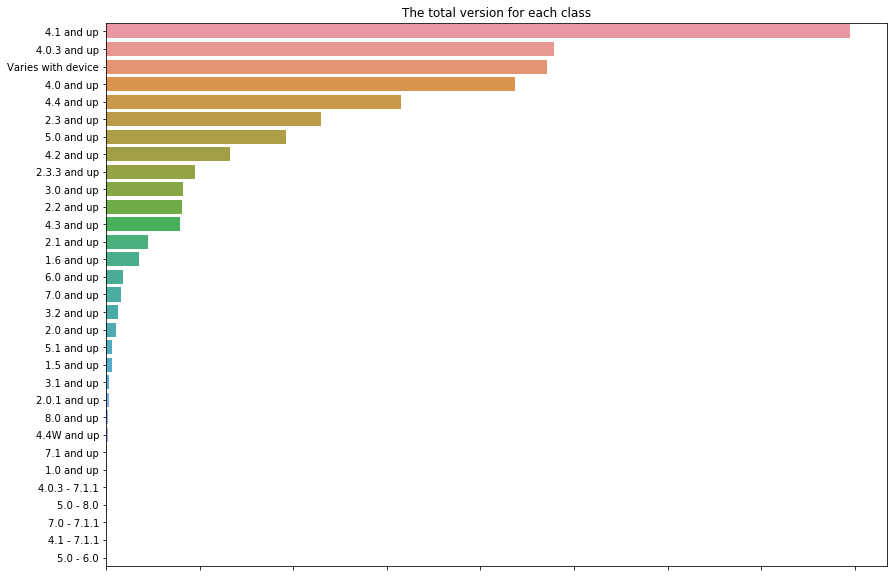

In [66]:
f, ax= plt.subplots(figsize = (14, 10));
g = sns.barplot(y=verCounts.index,x=verCounts.values,orient='V');
ax.set_xticklabels(g.get_xticklabels(), rotation=90);
ax.set_title("The total version for each class");

The most app do not support the device which android version is less than 4.0. 

## conclusion

**Q1**: Which category has the highest reviews?

**A1**: Maybe the GAME category has the highest reviews.This means people who play games likes to mark reviews.


**Q2**: What's The relationship between Rating a and Reviews?
    
**A2**: The Reviews and Rating are almost positive correlation.

**Q3**: What is the size of most applications
    
**A3**: The most app size is less 10M.

**Q4**: What is The relationship between Installs a and Reviews?
    
**A4**: The Installs does not have obvious relationship with Reviews.

**Q5**: What kind of applications are the most common in app store?
    
**A5**: The most app are free in app store.

**Q6**: What is The relationship between price a and Reviews?
    
**A6**: The higher the price, the fewer people scored.

**Q7**: Can I download the most applications on my phone which is base on android 3.2?
    
**A7**: No，the most app do not support the device which android version is less than 4.0. 

## 反思

**问题**：
1、对于缺失数据的操作，是否合理？

2、对于多变量之前的关系通过散点图进行分析是否完善？

3、对于category类型的数据，不方便操作？

4、数据样本的分析是否有价值？

5、对于seabron和matlibplot的使用很欠缺，需要进行更深入的学习。

**答案**：
1 在分析过程中，不应该简单的drop掉，应该根据数据的规律进行填充（mean，中位数，众数之类），来提高数据样本的数量，提高数据分析的准确性；

2、单纯的从多变量的散点图并不能很想想的表达两者之间的关系，应该借助关系矩阵，将不同数据之间的关系进行详细的分析；

3、category 类型的数据，应该转化为数值类型，这样在分析的时候更方便；

4、数据样本分析中，没有形成有效的分析，各个特征值的特性，以及特征之间的关系也没有很有效的展示出来；


恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。